In [890]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [891]:
import warnings
warnings.filterwarnings('ignore')

In [892]:
cardio_file_summary = pd.read_csv('resources/cardio_data_processed.csv')
cardio_file_summary.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [893]:
cardio_file_summary.shape

(68205, 17)

In [894]:
cardio_file_summary.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [895]:
cardio_file_summary.isnull().any()

id                     False
age                    False
gender                 False
height                 False
weight                 False
ap_hi                  False
ap_lo                  False
cholesterol            False
gluc                   False
smoke                  False
alco                   False
active                 False
cardio                 False
age_years              False
bmi                    False
bp_category            False
bp_category_encoded    False
dtype: bool

In [896]:
cardio_file_summary.dtypes

id                       int64
age                      int64
gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category             object
bp_category_encoded     object
dtype: object

In [897]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [898]:
engine= create_engine("sqlite:///resources/cardiovascular_disease.sqlite")

In [899]:
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [900]:
cardio_file_summary.to_sql('Cardiovascular-disease', engine, if_exists='replace', index=False)

68205

In [901]:
Base.classes.keys()

[]

In [902]:
cardiovascular_dataset= pd.read_sql_table('Cardiovascular-disease', con=engine)

In [903]:
cardiovascular_dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [904]:
cardiovascular_dataset.dropna(axis=0)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [905]:
cardiovascular_dataset.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [906]:
cardiovascular_dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [907]:
# we have two age columns one is calculated in days and one in years. Checking consistency between both age columns.
df = pd.DataFrame(cardiovascular_dataset)

# Recalculate Age_in_Years from Age_in_Days
df['Calculated_Age_in_Years'] = df['age'] // 365

# Check for consistency
df['Is_Consistent'] = df['age_years'] == df['Calculated_Age_in_Years']

print(df)


          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240       2     168    76.0    120     80            1     1   
68201  99995  22601       1     158   126.0    140     90            2     2   
68202  99996  19066       2     183   105.0    180     90            3     1   
68203  99998  22431       1     163    72.0    135     80            1     2   
68204  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  age

In [908]:
print(cardiovascular_dataset['age_years'].dtypes)

int64


In [909]:
#minimum age
min_age=cardiovascular_dataset['age_years'].min()
print(f'The minimum age is:{min_age}')


The minimum age is:29


In [910]:
#maximum age
max_age=cardiovascular_dataset['age_years'].max()
print(f'The maximum age is:{max_age}')


The maximum age is:64


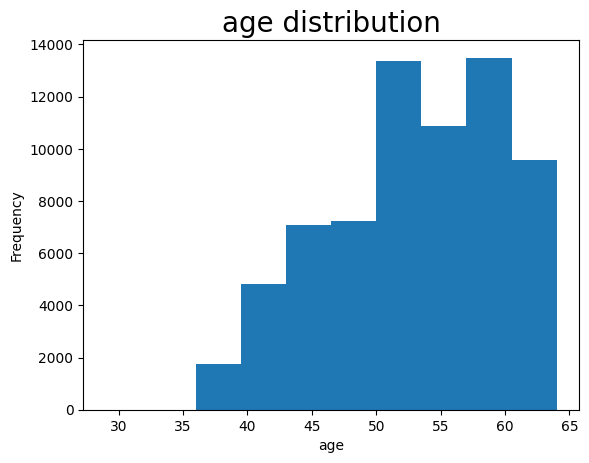

In [911]:
#Creating a histogram to visualize age distribution
cardiovascular_dataset['age_years'].plot (kind='hist')
plt.xlabel(xlabel='age')
plt.title('age distribution', fontsize = 20)
plt.show()

In [912]:
#using interquartile range (IQR) method to return the column and count of outliers.

#Returning all columns with the numeric dtypes

numeric_dtypes_columns = []

for column, values in cardiovascular_dataset.items():
    if values.dtypes != 'object':
        numeric_dtypes_columns.append(column)
        
#function to return a count of outliers

def count_outliers_in_columns(cardiovascular_dataset, columns):
    Q1 = cardiovascular_dataset[columns]. quantile(0.25)
    Q3 = cardiovascular_dataset[columns]. quantile(0.75)
    IQR = Q3 - Q1
    outliers = cardiovascular_dataset[((cardiovascular_dataset[columns] < (Q1 - 1.5*IQR)) | (cardiovascular_dataset[columns] > (Q3 + 1.5*IQR)))]
    return outliers[columns].count()
count_outliers_in_columns(cardiovascular_dataset, numeric_dtypes_columns)

id                 0
age                4
gender             0
height           502
weight          1711
ap_hi            648
ap_lo           3188
cholesterol    16983
gluc           10178
smoke           5979
alco            3624
active         13399
cardio             0
age_years          4
bmi             1988
dtype: int64

In [913]:
cardiovascular_dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


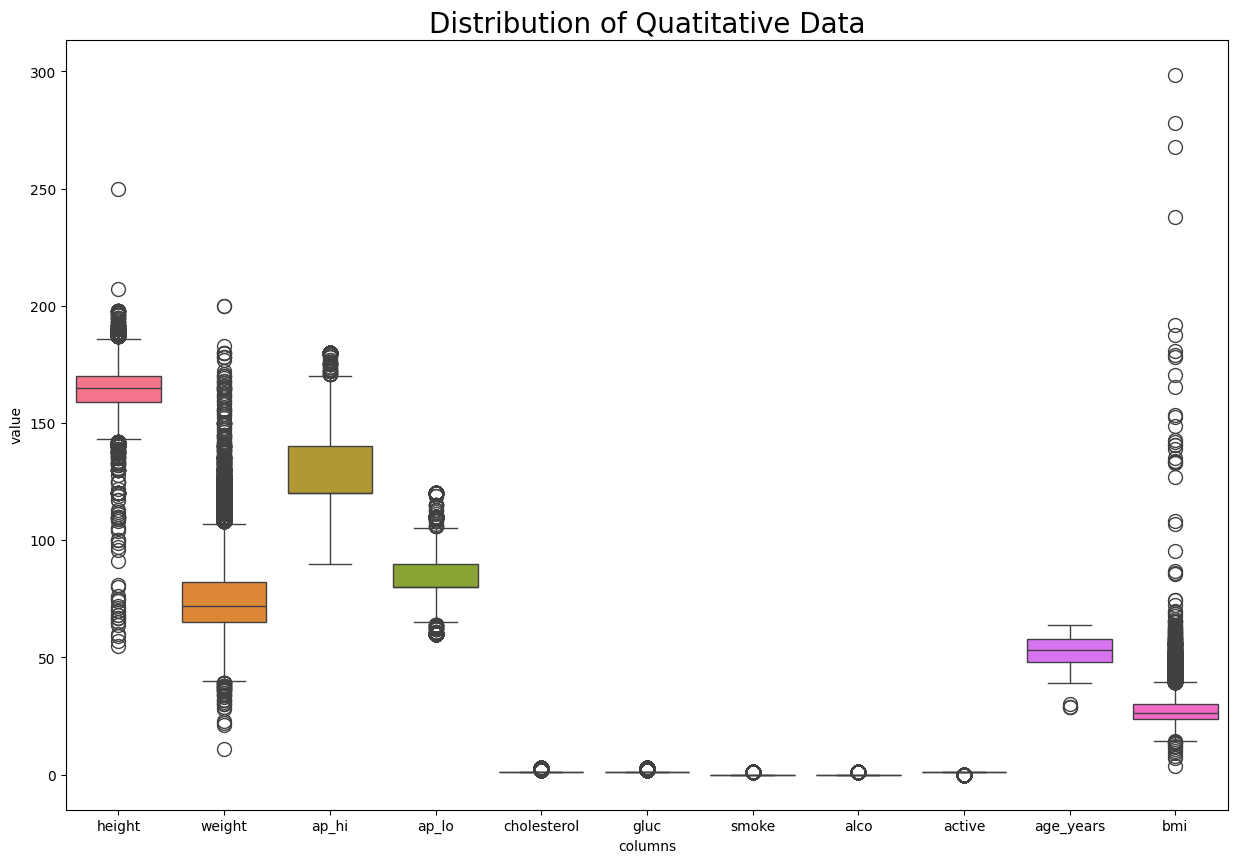

In [914]:
#visualizing outliers with boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=cardiovascular_dataset.drop(columns=(['id','age', 'gender', 'cardio']), inplace = False),
            saturation=0.95,
            fliersize=10,
            whis=1.5,
            width=0.8)
plt.xlabel(xlabel= "columns")
plt.ylabel(ylabel= "value")
plt.title("Distribution of Quatitative Data", fontsize = 20)
plt.show()


In [915]:
cardiovascular_dataset.shape

(68205, 17)

In [916]:
df = cardiovascular_dataset.copy()

In [917]:
df.shape

(68205, 17)

In [918]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [919]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [920]:
# Dropping outliers in a column 
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q1 + 1.5*IQR

# Dropping the outliers in a column
df = df[(df.bmi > lower_bound) & (df.bmi < upper_bound)]
df.shape

(59303, 17)

In [921]:

#verify the range of values for ap_hi & ap_lo columns
print(df[['ap_hi', 'ap_lo']].describe())


              ap_hi         ap_lo
count  59303.000000  59303.000000
mean     125.318770     80.714298
std       15.450874      8.948687
min       90.000000     60.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      130.000000     90.000000
max      180.000000    120.000000


In [922]:
#creatingnew features- bmi categories for underweight, normal, overweight and obese
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [923]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,bmi_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1,Normal
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1,Normal
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal,Normal
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1,Hypertension Stage 1,Overweight


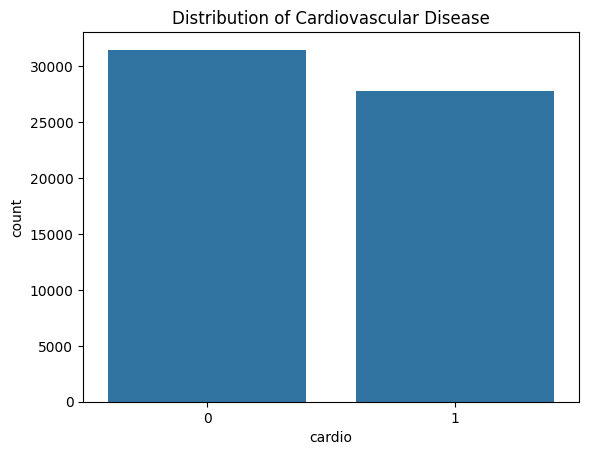

In [924]:
#checking the balance of the cardio target variables
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease')
plt.show()


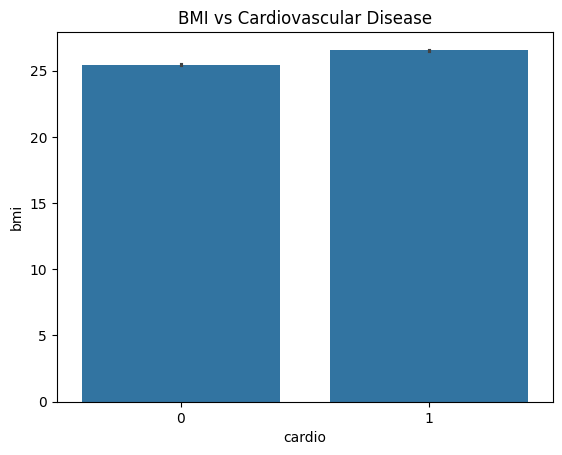

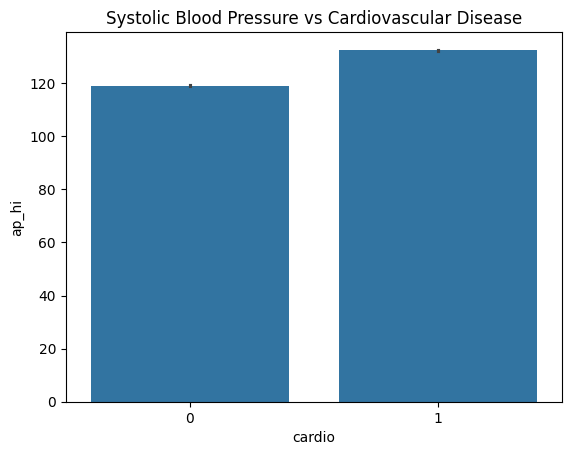

In [925]:
#checking the features cardio categories.
sns.barplot(x='cardio', y='bmi', data=df)
plt.title('BMI vs Cardiovascular Disease')
plt.show()

sns.barplot(x='cardio', y='ap_hi', data=df)
plt.title('Systolic Blood Pressure vs Cardiovascular Disease')
plt.show()


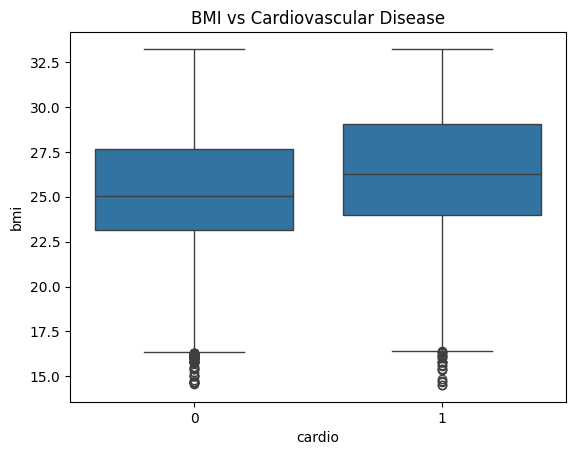

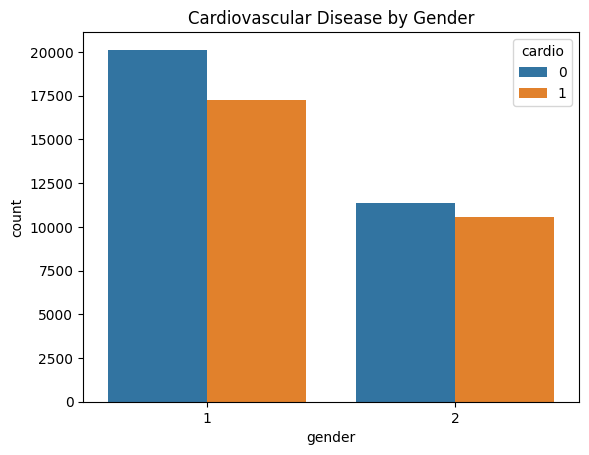

In [926]:
sns.boxplot(x='cardio', y='bmi', data=df)
plt.title('BMI vs Cardiovascular Disease')
plt.show()

sns.countplot(x='gender', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Gender')
plt.show()


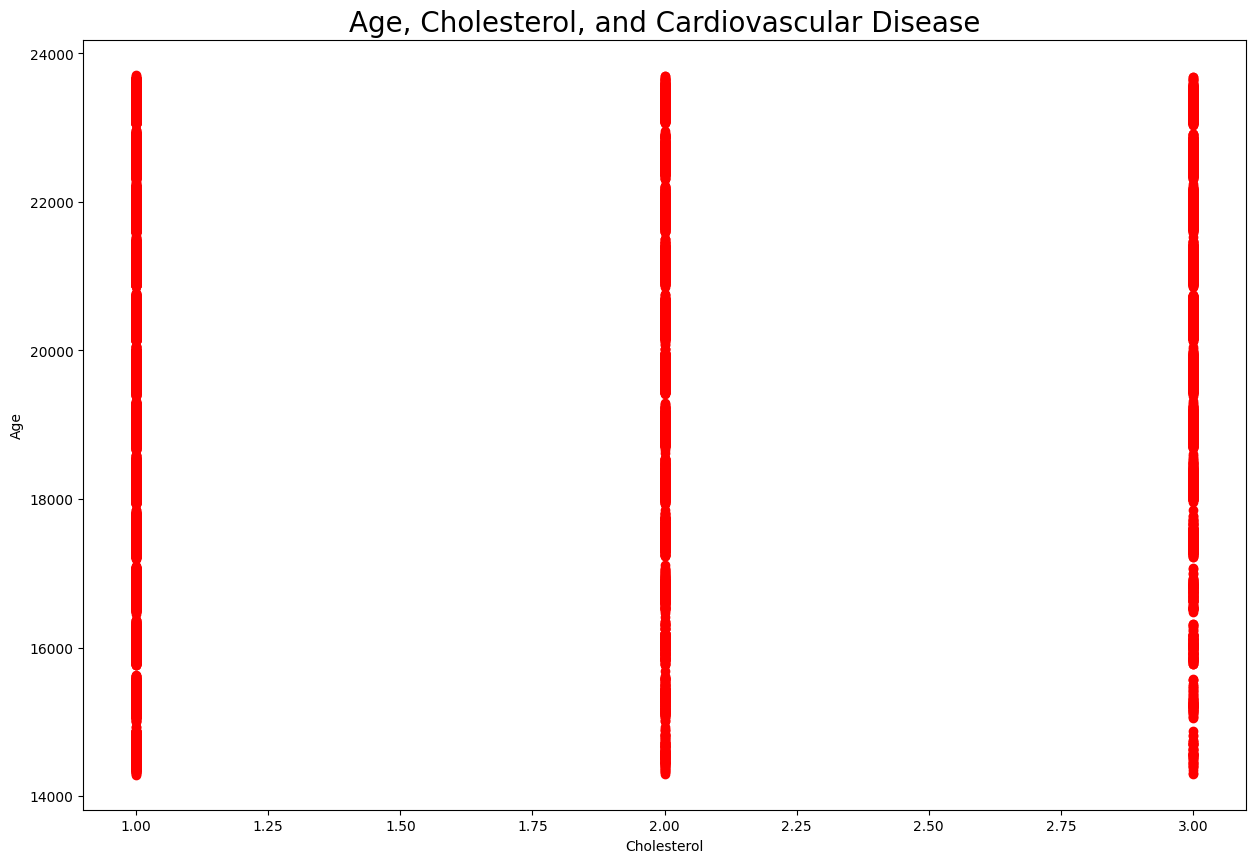

In [927]:
plt.figure(figsize=(15, 10))

# Filter rows where cardio == 1
filtered_df = df[df.cardio == 1]

# Scatter plot for cholesterol vs. age for patients with cardiovascular disease
plt.scatter(filtered_df.cholesterol, filtered_df.age, c='red')

plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.title('Age, Cholesterol, and Cardiovascular Disease', fontsize=20)
plt.show()



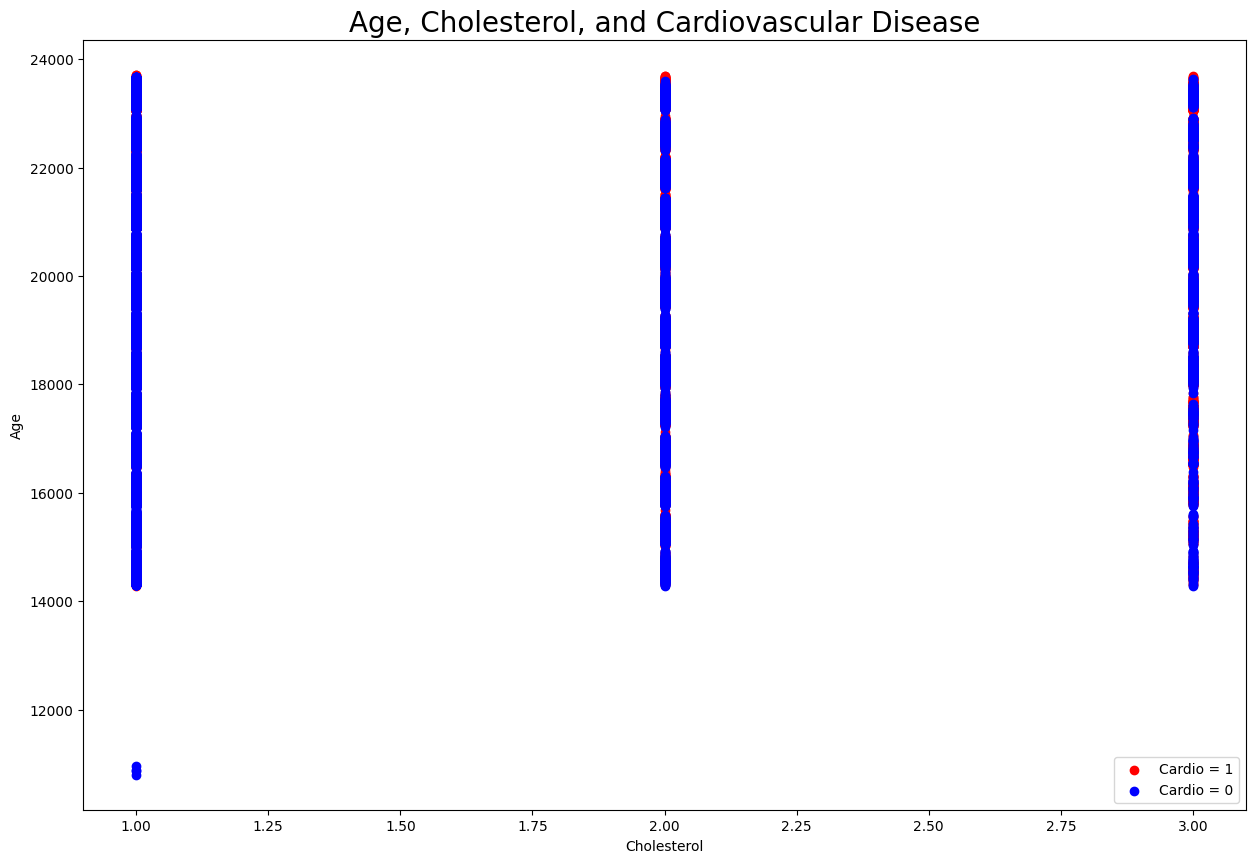

In [928]:
plt.figure(figsize=(15, 10))

# Scatter for cardio == 1
plt.scatter(df.cholesterol[df.cardio == 1], df.age[df.cardio == 1], c='red', label='Cardio = 1')

# Scatter for cardio == 0
plt.scatter(df.cholesterol[df.cardio == 0], df.age[df.cardio == 0], c='blue', label='Cardio = 0')

plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.title('Age, Cholesterol, and Cardiovascular Disease', fontsize=20)
plt.legend()
plt.show()


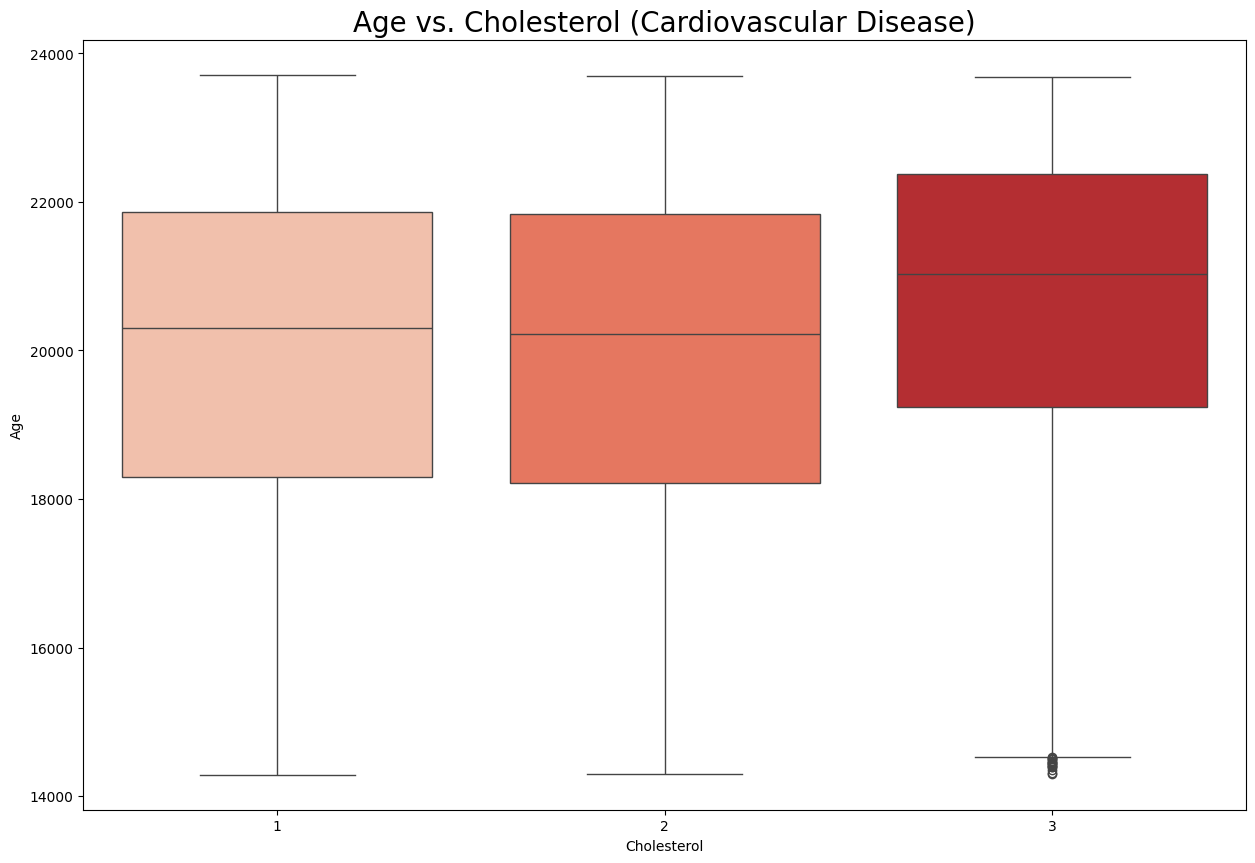

In [929]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='cholesterol', y='age', data=df[df['cardio'] == 1], palette='Reds')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.title('Age vs. Cholesterol (Cardiovascular Disease)', fontsize=20)
plt.show()



This box plot shows the relationship between cholesterol levels (on the x-axis) and age (on the y-axis) for individuals with cardiovascular disease.The x-axis represents cholesterol categories:
1: Normal cholesterol
2: Above normal cholesterol
3: Well above normal cholesterol
The y-axis represents age, measured in days.
Age Increases with Higher Cholesterol: Individuals with well-above-normal cholesterol (category 3) tend to be older than those with normal or above-normal cholesterol.
Outliers in Category 3: There are younger individuals with well-above-normal cholesterol, which might warrant further investigation (e.g., genetic predisposition or lifestyle factors).


<Axes: xlabel='cholesterol', ylabel='age'>

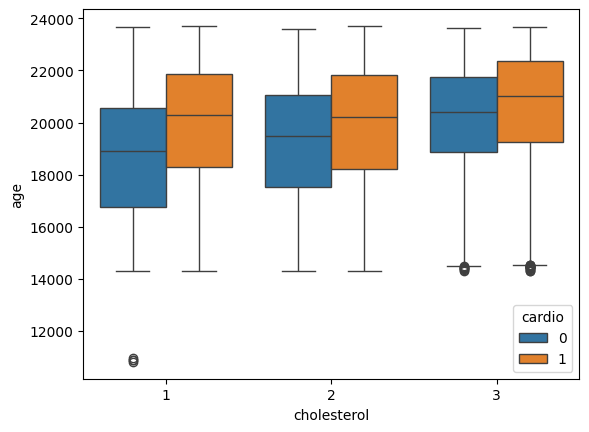

In [930]:
#adding cardio as a hue
sns.boxplot(x='cholesterol', y='age', hue='cardio', data=df)


In [931]:
print(df.dtypes)


id                        int64
age                       int64
gender                    int64
height                    int64
weight                  float64
ap_hi                     int64
ap_lo                     int64
cholesterol               int64
gluc                      int64
smoke                     int64
alco                      int64
active                    int64
cardio                    int64
age_years                 int64
bmi                     float64
bp_category              object
bp_category_encoded      object
bmi_category           category
dtype: object


In [932]:
#exclude non numerical columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr = numeric_df.corr()  # Calculate correlation matrix


In [933]:
#Inspect and convert categorical columns 

df['bp_category_encoded'] = df['bp_category'].map({
    'Normal': 0,
    'Elevated': 1,
    'Hypertension Stage 1': 2,
    'Hypertension Stage 2': 3
})



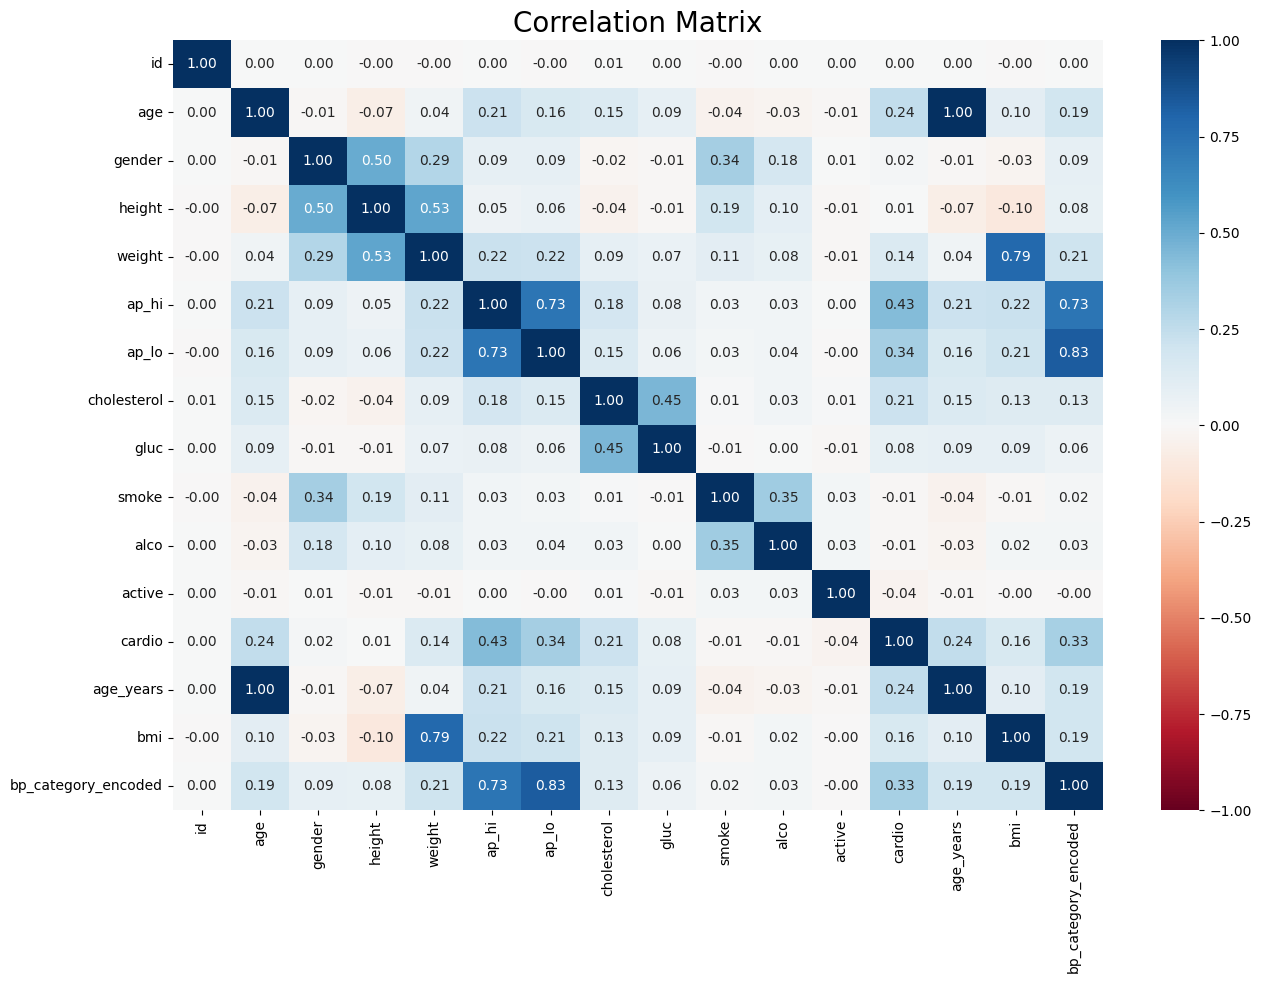

In [934]:
#Creating a heatmap 

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu", 
            vmin=-1, vmax=1, 
            fmt=".2f")
plt.title("Correlation Matrix", fontsize=20)
plt.show()


##Model Building

In [935]:
#extracting thetarget column from the dataframe
y = df["cardio"]
X= df.drop(columns=["cardio", "id"])

In [936]:
#checking the shape of x and y
X.shape, y.shape

((59303, 16), (59303,))

In [937]:
X.dtypes

age                       int64
gender                    int64
height                    int64
weight                  float64
ap_hi                     int64
ap_lo                     int64
cholesterol               int64
gluc                      int64
smoke                     int64
alco                      int64
active                    int64
age_years                 int64
bmi                     float64
bp_category              object
bp_category_encoded       int64
bmi_category           category
dtype: object

In [938]:
X.columns = X.columns.astype(str)

In [939]:
X.columns = [str(col) for col in X.columns]


In [940]:
X.dtypes

age                       int64
gender                    int64
height                    int64
weight                  float64
ap_hi                     int64
ap_lo                     int64
cholesterol               int64
gluc                      int64
smoke                     int64
alco                      int64
active                    int64
age_years                 int64
bmi                     float64
bp_category              object
bp_category_encoded       int64
bmi_category           category
dtype: object

In [941]:
print(X.columns)  # Verify all column names
print(type(X.columns[0]))  # Ensure they are all <class 'str'>


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category',
       'bp_category_encoded', 'bmi_category'],
      dtype='object')
<class 'str'>


In [942]:
# Convert categorical features to numeric (choose one of the methods above)
X['bp_category_encoded'] = X['bp_category'].map({
    'Normal': 0, 'Hypertension Stage 1': 1, 'Hypertension Stage 2': 2
})

In [943]:
#Drop the original categorical column
X.drop(columns=['bp_category'], inplace=True)


In [944]:
# Convert categorical variables to numeric
X['bmi_category_encoded'] = X['bmi_category'].map({
    'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3
})
X.drop(columns=['bmi_category'], inplace=True)  # Drop original column

In [945]:
#splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [946]:
print(X.isna().sum()) 

age                        0
gender                     0
height                     0
weight                     0
ap_hi                      0
ap_lo                      0
cholesterol                0
gluc                       0
smoke                      0
alco                       0
active                     0
age_years                  0
bmi                        0
bp_category_encoded     2869
bmi_category_encoded       0
dtype: int64


In [947]:
# Fill missing numerical values with median
X.fillna(X.mode(), inplace=True)

# Fill missing categorical values with mode (most common category)
X.fillna(X.mode().iloc[0], inplace=True)


In [948]:
X.dropna(inplace=True)
y = y[X.index]  # Ensure target variable matches X after dropping rows


In [949]:

# Extract target column
y = df["cardio"]
X = df.drop(columns=["cardio", "id"])  # Drop target and ID columns

# Convert all column names to strings
X.columns = [str(col) for col in X.columns]  # 🔹 Fix for Feature Name TypeError

# Convert categorical features to numeric
X['bp_category_encoded'] = X['bp_category'].map({
    'Normal': 0, 'Hypertension Stage 1': 1, 'Hypertension Stage 2': 2
})
X.drop(columns=['bp_category'], inplace=True)  # Drop original column

X['bmi_category_encoded'] = X['bmi_category'].map({
    'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3
})
X.drop(columns=['bmi_category'], inplace=True)  # Drop original column

# 🔹 Fix Missing Values
X.fillna(X.mode().iloc[0], inplace=True)  # Fix incorrect NaN handling

# Ensure y has the same rows as X after dropping NaNs
y = y.loc[X.index]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric data while keeping column names
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Train Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# Evaluate the model
score_on_test_data = clf.score(X_test_scaled, y_test)
print(f'Test data accuracy: {score_on_test_data*100:.2f}%')

Test data accuracy: 72.35%


In [950]:
# Scale the data using StandardScaler while keeping column names
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Train the clasifier

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# Evaluate the classsifier on the test data
score_on_test_data = clf.score(X_test_scaled,y_test)

print(f'Test data accuracy: {score_on_test_data*100:.2f}%')




Test data accuracy: 72.35%


In [951]:

# Define the parameter distributions
distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Corrected values
    'max_iter': np.arange(100, 800, 50),           # Optimized range
    'C': np.logspace(-3, 3, 10),                   # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # Compatible solvers
    'l1_ratio': np.linspace(0, 1, 10),             # Only used if penalty='elasticnet'
    'warm_start': [True, False]
}

# Initialize RandomizedSearchCV
clf = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=distributions,
    n_iter=100,                  # Number of random combinations
    scoring='accuracy',          # Evaluation metric
    n_jobs=-1,                   # Use all available cores
    verbose=3,                   # Show progress
    random_state=42              # Reproducibility
)

# Fit the RandomizedSearchCV
clf.fit(X_train, y_train)

# Get the best hyperparameters
best_params = clf.best_params_
print(f"Best hyperparameters: {best_params}")

# Instantiate the model using the best parameters
clf_best = LogisticRegression(**best_params)

# Fit the model on the training data
clf_best.fit(X_train, y_train)

# Get accuracy score on test data
accuracy_score = clf_best.score(X_test, y_test)
print(f'Test data Accuracy: {accuracy_score*100:.2f}%')


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 5/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=250, penalty=elasticnet, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=250, penalty=elasticnet, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=250, penalty=elasticnet, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=250, penalty=elasticnet, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=250, penalty=elasticnet, solver=liblinear, warm_start=False;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The 

[CV 3/5] END C=215.44346900318823, l1_ratio=0.5555555555555556, max_iter=200, penalty=l2, solver=newton-cg, warm_start=True;, score=0.722 total time=   1.9s
[CV 5/5] END C=215.44346900318823, l1_ratio=0.5555555555555556, max_iter=200, penalty=l2, solver=newton-cg, warm_start=True;, score=0.734 total time=   1.9s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py

[CV 2/5] END C=215.44346900318823, l1_ratio=0.5555555555555556, max_iter=200, penalty=l2, solver=newton-cg, warm_start=True;, score=0.728 total time=   2.1s
[CV 1/5] END C=215.44346900318823, l1_ratio=0.5555555555555556, max_iter=200, penalty=l2, solver=newton-cg, warm_start=True;, score=0.725 total time=   2.1s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=215.44346900318823, l1_ratio=0.5555555555555556, max_iter=200, penalty=l2, solver=newton-cg, warm_start=True;, score=0.731 total time=   2.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.697 total time=   7.4s
[CV 5/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.708 total time=   7.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.712 total time=   7.7s
[CV 2/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.705 total time=   7.7s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 3/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.700 total time=   8.3s
[CV 1/5] END C=1000.0, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=True;, score=0.697 total time=   6.4s
[CV 2/5] END C=1000.0, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=True;, score=0.704 total time=   6.4s
[CV 3/5] END C=1000.0, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=True;, score=0.700 total time=   6.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python

[CV 4/5] END C=1000.0, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=True;, score=0.711 total time=   6.3s
[CV 1/5] END C=0.004641588833612777, l1_ratio=0.3333333333333333, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.718 total time=   0.3s
[CV 3/5] END C=0.004641588833612777, l1_ratio=0.3333333333333333, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.713 total time=   0.3s
[CV 1/5] END C=0.1, l1_ratio=0.7777777777777777, max_iter=500, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END C=1000.0, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=True;, score=0.707 total time=   6.4s
[CV 2/5] END C=0.004641588833612777, l1_ratio=0.3333333333333333, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.723 total time=   0.4s
[CV 4/5] END C=0.004641588833612777, l1_ratio=0.3333333333333333, max_iter=750, penalty=none, solver=lbfgs, warm_start=False

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.

[CV 1/5] END C=215.44346900318823, l1_ratio=0.3333333333333333, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.726 total time=   0.2s
[CV 2/5] END C=215.44346900318823, l1_ratio=0.3333333333333333, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.726 total time=   0.2s
[CV 5/5] END C=0.004641588833612777, l1_ratio=0.3333333333333333, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.732 total time=   0.4s
[CV 3/5] END C=215.44346900318823, l1_ratio=0.3333333333333333, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.720 total time=   0.2s
[CV 4/5] END C=215.44346900318823, l1_ratio=0.3333333333333333, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.729 total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.719 total time=   0.2s
[CV 5/5] END C=215.44346900318823, l1_ratio=0.3333333333333333, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.733 total time=   0.2s
[CV 1/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.726 total time=   0.2s
[CV 2/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.725 total time=   0.2s
[CV 4/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.728 total time=   0.2s
[CV 5/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=100, penalty=l2, solver=liblinear, warm_start=True;, score=0.733 total time=   0.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 1/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.689 total time=   2.8s
[CV 2/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.696 total time=   2.7s
[CV 1/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=600, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=600, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=600, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=600, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=0.5555555555555556, max_iter=600, penalty=elasticne

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.692 total time=   2.8s
[CV 4/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.701 total time=   3.0s
[CV 3/5] END C=1000.0, l1_ratio=0.8888888888888888, max_iter=450, penalty=l1, solver=liblinear, warm_start=False;, score=0.721 total time=   1.9s
[CV 4/5] END C=1000.0, l1_ratio=0.8888888888888888, max_iter=450, penalty=l1, solver=liblinear, warm_start=False;, score=0.730 total time=   1.9s
[CV 2/5] END C=1000.0, l1_ratio=0.8888888888888888, max_iter=450, penalty=l1, solver=liblinear, warm_start=False;, score=0.727 total time=   2.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.700 total time=   3.2s
[CV 5/5] END C=1000.0, l1_ratio=0.8888888888888888, max_iter=450, penalty=l1, solver=liblinear, warm_start=False;, score=0.733 total time=   2.2s
[CV 1/5] END C=1000.0, l1_ratio=0.8888888888888888, max_iter=450, penalty=l1, solver=liblinear, warm_start=False;, score=0.725 total time=   2.7s
[CV 2/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=liblinear, warm_start=True;, score=0.727 total time=   2.2s
[CV 1/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=lbfgs, warm_start=False;, score=nan tot

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 4/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=liblinear, warm_start=True;, score=0.730 total time=   2.1s
[CV 3/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=liblinear, warm_start=True;, score=0.721 total time=   2.5s
[CV 1/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=liblinear, warm_start=True;, score=0.725 total time=   2.9s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 5/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=600, penalty=l1, solver=liblinear, warm_start=True;, score=0.733 total time=   2.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not co

[CV 1/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=650, penalty=none, solver=newton-cg, warm_start=False;, score=0.725 total time=   1.8s
[CV 1/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=650, penalty=none, solver=newton-cg, warm_start=False;, score=0.722 total time=   2.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=650, penalty=none, solver=newton-cg, warm_start=False;, score=0.728 total time=   2.4s
[CV 5/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=650, penalty=none, solver=newton-cg, warm_start=False;, score=0.734 total time=   1.9s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=650, penalty=none, solver=newton-cg, warm_start=False;, score=0.731 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 2/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=600, penalty=elasticnet, solver=saga, warm_start=False;, score=0.703 total time=   7.8s
[CV 1/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=600, penalty=elasticnet, solver=saga, warm_start=False;, score=0.695 total time=   7.9s
[CV 2/5] END C=0.1, l1_ratio=1.0, max_iter=250, penalty=l1, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, l1_ratio=1.0, max_iter=250, penalty=l1, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=1.0, max_iter=250, penalty=l1, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=1.0, max_iter=250, penalty=l1, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=1.0, max_iter=250, penalty=l1, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 1/5] END C=215.44346900318823, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=saga, warm_start=True;, score=0.694 total time=   4.8s
[CV 4/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=600, penalty=elasticnet, solver=saga, warm_start=False;, score=0.710 total time=   7.8s
[CV 3/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=600, penalty=elasticnet, solver=saga, warm_start=False;, score=0.699 total time=   7.9s
[CV 1/5] END C=0.46415888336127775, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=lbfgs, warm_start=False;, score=0.718 total time=   0.3s
[CV 2/5] END C=0.46415888336127775, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=lbfgs, warm_start=False;, score=0.723 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.46415888336127775, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=lbfgs, warm_start=False;, score=0.713 total time=   0.3s
[CV 5/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=600, penalty=elasticnet, solver=saga, warm_start=False;, score=0.707 total time=   7.7s
[CV 4/5] END C=0.46415888336127775, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=lbfgs, warm_start=False;, score=0.724 total time=   0.3s
[CV 5/5] END C=0.46415888336127775, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=lbfgs, warm_start=False;, score=0.732 total time=   0.3s
[CV 2/5] END C=215.44346900318823, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=saga, warm_start=True;, score=0.702 total time=   4.8s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python

[CV 3/5] END C=215.44346900318823, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=saga, warm_start=True;, score=0.698 total time=   4.7s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=215.44346900318823, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=saga, warm_start=True;, score=0.707 total time=   4.8s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 5/5] END C=215.44346900318823, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=saga, warm_start=True;, score=0.704 total time=   4.7s
[CV 2/5] END C=10.0, l1_ratio=0.4444444444444444, max_iter=100, penalty=elasticnet, solver=saga, warm_start=False;, score=0.690 total time=   1.2s
[CV 1/5] END C=10.0, l1_ratio=0.4444444444444444, max_iter=100, penalty=elasticnet, solver=saga, warm_start=False;, score=0.685 total time=   1.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 4/5] END C=10.0, l1_ratio=0.4444444444444444, max_iter=100, penalty=elasticnet, solver=saga, warm_start=False;, score=0.693 total time=   1.1s
[CV 3/5] END C=10.0, l1_ratio=0.4444444444444444, max_iter=100, penalty=elasticnet, solver=saga, warm_start=False;, score=0.684 total time=   1.2s
[CV 5/5] END C=10.0, l1_ratio=0.4444444444444444, max_iter=100, penalty=elasticnet, solver=saga, warm_start=False;, score=0.690 total time=   1.1s
[CV 2/5] END C=10.0, l1_ratio=0.1111111111111111, max_iter=300, penalty=none, solver=lbfgs, warm_start=True;, score=0.723 total time=   0.3s
[CV 1/5] END C=10.0, l1_ratio=0.1111111111111111, max_iter=300, penalty=none, solver=lbfgs, warm_start=True;, score=0.718 total time=   0.3s
[CV 1/5] END C=1000.0, l1_ratio=0.2222222222222222, max_iter=400, penalty=none, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END C=1000.0, l1_ratio=0.2222222222222222, max_iter=400, penalty=none, solver=liblinear, warm_start=True;, score=nan total 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 1/5] END C=0.004641588833612777, l1_ratio=0.4444444444444444, max_iter=250, penalty=none, solver=saga, warm_start=True;, score=0.692 total time=   2.9s
[CV 2/5] END C=0.004641588833612777, l1_ratio=0.4444444444444444, max_iter=250, penalty=none, solver=saga, warm_start=True;, score=0.698 total time=   2.9s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py

[CV 1/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=newton-cg, warm_start=True;, score=0.725 total time=   1.8s
[CV 5/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=newton-cg, warm_start=True;, score=0.734 total time=   1.8s
[CV 3/5] END C=0.004641588833612777, l1_ratio=0.4444444444444444, max_iter=250, penalty=none, solver=saga, warm_start=True;, score=0.695 total time=   3.1s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/lin

[CV 3/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=newton-cg, warm_start=True;, score=0.722 total time=   2.1s
[CV 1/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=150, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=150, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=150, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=150, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=150, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.

[CV 2/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=newton-cg, warm_start=True;, score=0.728 total time=   2.4s
[CV 4/5] END C=0.004641588833612777, l1_ratio=0.4444444444444444, max_iter=250, penalty=none, solver=saga, warm_start=True;, score=0.701 total time=   3.3s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-pa

[CV 4/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=newton-cg, warm_start=True;, score=0.731 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004641588833612777, l1_ratio=0.4444444444444444, max_iter=250, penalty=none, solver=saga, warm_start=True;, score=0.701 total time=   3.5s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=0.46415888336127775, l1_ratio=0.1111111111111111, max_iter=150, penalty=none, solver=newton-cg, warm_start=False;, score=0.725 total time=   1.7s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5] END C=0.46415888336127775, l1_ratio=0.1111111111111111, max_iter=150, penalty=none, solver=newton-cg, warm_start=False;, score=0.722 total time=   1.9s
[CV 5/5] END C=0.46415888336127775, l1_ratio=0.1111111111111111, max_iter=150, penalty=none, solver=newton-cg, warm_start=False;, score=0.734 total time=   1.8s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5] END C=0.46415888336127775, l1_ratio=0.1111111111111111, max_iter=150, penalty=none, solver=newton-cg, warm_start=False;, score=0.728 total time=   2.4s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging

[CV 4/5] END C=0.46415888336127775, l1_ratio=0.1111111111111111, max_iter=150, penalty=none, solver=newton-cg, warm_start=False;, score=0.731 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/hom

[CV 1/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=newton-cg, warm_start=True;, score=0.725 total time=   2.3s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py

[CV 4/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=newton-cg, warm_start=True;, score=0.731 total time=   2.0s
[CV 2/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=newton-cg, warm_start=True;, score=0.728 total time=   2.5s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=newton-cg, warm_start=True;, score=0.722 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag

[CV 5/5] END C=0.46415888336127775, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=newton-cg, warm_start=True;, score=0.734 total time=   2.4s
[CV 1/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=none, solver=saga, warm_start=False;, score=0.694 total time=   4.7s
[CV 3/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=none, solver=saga, warm_start=False;, score=0.697 total time=   4.5s
[CV 2/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=none, solver=saga, warm_start=False;, score=0.702 total time=   4.6s
[CV 1/5] END C=0.001, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=liblinear, warm_start=False;, score=0.723 total time=   0.1s
[CV 2/5] END C=0.001, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=liblinear, warm_start=False;, score=0.725 total time=   0.1s
[CV 3/5] END C=0.001, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=liblinear, warm_start=False;, score=0.721 total time=   0.2s
[CV 1/5] END C=0.001, l1_r

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.

[CV 5/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=none, solver=saga, warm_start=False;, score=0.703 total time=   4.8s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The 

[CV 1/5] END C=46.41588833612773, l1_ratio=0.0, max_iter=350, penalty=none, solver=newton-cg, warm_start=False;, score=0.725 total time=   1.7s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=46.41588833612773, l1_ratio=0.0, max_iter=350, penalty=none, solver=newton-cg, warm_start=False;, score=0.722 total time=   2.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/5] END C=46.41588833612773, l1_ratio=0.0, max_iter=350, penalty=none, solver=newton-cg, warm_start=False;, score=0.728 total time=   2.3s
[CV 5/5] END C=46.41588833612773, l1_ratio=0.0, max_iter=350, penalty=none, solver=newton-cg, warm_start=False;, score=0.734 total time=   1.9s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=46.41588833612773, l1_ratio=0.0, max_iter=350, penalty=none, solver=newton-cg, warm_start=False;, score=0.731 total time=   2.6s
[CV 1/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=400, penalty=l1, solver=liblinear, warm_start=True;, score=0.724 total time=   4.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=400, penalty=l1, solver=liblinear, warm_start=True;, score=0.721 total time=   4.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=400, penalty=l1, solver=liblinear, warm_start=True;, score=0.728 total time=   4.1s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=400, penalty=l1, solver=liblinear, warm_start=True;, score=0.732 total time=   3.9s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=46.41588833612773, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=False;, score=0.697 total time=   8.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=46.41588833612773, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=False;, score=0.700 total time=   8.1s
[CV 1/5] END C=0.001, l1_ratio=0.8888888888888888, max_iter=550, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.8888888888888888, max_iter=550, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.8888888888888888, max_iter=550, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.8888888888888888, max_iter=550, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.8888888888888888, max_iter=550, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 1/5] END C=1000.0, l1_ratio=0.2222222222222222, max_iter=700, penalty=l1, solver=newton-cg, warm_start=True

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=46.41588833612773, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=False;, score=0.704 total time=   8.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=46.41588833612773, l1_ratio=1.0, max_iter=650, penalty=none, solver=saga, warm_start=False;, score=0.707 total time=   8.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10.0, l1_ratio=0.8888888888888888, max_iter=500, penalty=elasticnet, solver=saga, warm_start=True;, score=0.696 total time=   6.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/5] END C=10.0, l1_ratio=0.8888888888888888, max_iter=500, penalty=elasticnet, solver=saga, warm_start=True;, score=0.703 total time=   6.8s
[CV 1/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=350, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=350, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=350, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=350, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=350, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 1/5] END C=0.46415888336127775, l1_ratio=0.8888888888888888, max_iter=500, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time= 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=10.0, l1_ratio=0.8888888888888888, max_iter=500, penalty=elasticnet, solver=saga, warm_start=True;, score=0.698 total time=   7.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=10.0, l1_ratio=0.8888888888888888, max_iter=500, penalty=elasticnet, solver=saga, warm_start=True;, score=0.708 total time=   6.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/5] END C=0.001, l1_ratio=0.7777777777777777, max_iter=750, penalty=l1, solver=saga, warm_start=True;, score=0.705 total time=   9.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=0.001, l1_ratio=0.7777777777777777, max_iter=750, penalty=l1, solver=saga, warm_start=True;, score=0.700 total time=   9.8s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 1/5] END C=0.001, l1_ratio=0.7777777777777777, max_iter=750, penalty=l1, solver=saga, warm_start=True;, score=0.695 total time=  10.7s
[CV 5/5] END C=0.001, l1_ratio=0.7777777777777777, max_iter=750, penalty=l1, solver=saga, warm_start=True;, score=0.707 total time=  10.1s
[CV 1/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=500, penalty=none, solver=lbfgs, warm_start=True;, score=0.718 total time=   0.4s
[CV 2/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=500, penalty=none, solver=lbfgs, warm_start=True;, score=0.723 total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 3/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=500, penalty=none, solver=lbfgs, warm_start=True;, score=0.713 total time=   0.3s
[CV 4/5] END C=0.001, l1_ratio=0.7777777777777777, max_iter=750, penalty=l1, solver=saga, warm_start=True;, score=0.711 total time=  10.8s
[CV 1/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total ti

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.

[CV 5/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=500, penalty=none, solver=lbfgs, warm_start=True;, score=0.732 total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=100, penalty=l2, solver=saga, warm_start=False;, score=0.686 total time=   1.6s
[CV 2/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=100, penalty=l2, solver=saga, warm_start=False;, score=0.689 total time=   1.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python

[CV 3/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=100, penalty=l2, solver=saga, warm_start=False;, score=0.684 total time=   1.5s
[CV 1/5] END C=0.004641588833612777, l1_ratio=0.8888888888888888, max_iter=650, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.004641588833612777, l1_ratio=0.8888888888888888, max_iter=650, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.004641588833612777, l1_ratio=0.8888888888888888, max_iter=650, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.004641588833612777, l1_ratio=0.8888888888888888, max_iter=650, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=0.004641588833612777, l1_ratio=0.8888888888888888, max_iter=650, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.021544346900318832, l1_ratio=0.3

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 3/5] END C=1000.0, l1_ratio=0.5555555555555556, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.713 total time=   0.3s
[CV 4/5] END C=1000.0, l1_ratio=0.5555555555555556, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.724 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5] END C=1000.0, l1_ratio=0.5555555555555556, max_iter=750, penalty=none, solver=lbfgs, warm_start=False;, score=0.732 total time=   0.4s
[CV 1/5] END C=0.021544346900318832, l1_ratio=0.4444444444444444, max_iter=500, penalty=l2, solver=lbfgs, warm_start=True;, score=0.718 total time=   0.3s
[CV 5/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=100, penalty=l2, solver=saga, warm_start=False;, score=0.690 total time=   1.4s
[CV 4/5] END C=1000.0, l1_ratio=0.6666666666666666, max_iter=100, penalty=l2, solver=saga, warm_start=False;, score=0.693 total time=   1.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_log

[CV 3/5] END C=0.021544346900318832, l1_ratio=0.4444444444444444, max_iter=500, penalty=l2, solver=lbfgs, warm_start=True;, score=0.713 total time=   0.2s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.3333333333333333, max_iter=600, penalty=l1, solver=liblinear, warm_start=False;, score=0.732 total time=   4.5s
[CV 2/5] END C=0.021544346900318832, l1_ratio=0.4444444444444444, max_iter=500, penalty=l2, solver=lbfgs, warm_start=True;, score=0.725 total time=   0.4s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.4444444444444444, max_iter=500, penalty=l2, solver=lbfgs, warm_start=True;, score=0.728 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 4/5] END C=0.021544346900318832, l1_ratio=0.4444444444444444, max_iter=500, penalty=l2, solver=lbfgs, warm_start=True;, score=0.728 total time=   0.4s
[CV 1/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.718 total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.713 total time=   0.3s
[CV 2/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.723 total time=   0.3s
[CV 4/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.724 total time=   0.3s
[CV 5/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.732 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 5/5] END C=10.0, l1_ratio=0.8888888888888888, max_iter=500, penalty=elasticnet, solver=saga, warm_start=True;, score=0.706 total time=   8.8s
[CV 1/5] END C=2.154434690031882, l1_ratio=0.2222222222222222, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=2.154434690031882, l1_ratio=0.2222222222222222, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=2.154434690031882, l1_ratio=0.2222222222222222, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=2.154434690031882, l1_ratio=0.2222222222222222, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=2.154434690031882, l1_ratio=0.2222222222222222, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, l1_ratio=0.8888888888888888, max_iter=300, penalt

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=450, penalty=l1, solver=liblinear, warm_start=True;, score=0.727 total time=   2.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=400, penalty=l1, solver=liblinear, warm_start=True;, score=0.726 total time=  25.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172:

[CV 1/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=650, penalty=elasticnet, solver=saga, warm_start=True;, score=0.696 total time=  10.0s
[CV 2/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=650, penalty=elasticnet, solver=saga, warm_start=True;, score=0.704 total time=   9.9s
[CV 3/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=650, penalty=elasticnet, solver=saga, warm_start=True;, score=0.700 total time=   9.9s
[CV 5/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=650, penalty=elasticnet, solver=saga, warm_start=True;, score=0.706 total time=   9.8s
[CV 4/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=650, penalty=elasticnet, solver=saga, warm_start=True;, score=0.710 total time=   9.9s
[CV 5/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=450, penalty=l1, solver=liblinear, warm_start=True;, score=0.733 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=0.021544346900318832, l1_ratio=0.3333333333333333, max_iter=600, penalty=l1, solver=liblinear, warm_start=False;, score=0.724 total time=  19.8s
[CV 1/5] END C=215.44346900318823, l1_ratio=0.0, max_iter=200, penalty=elasticnet, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END C=215.44346900318823, l1_ratio=0.0, max_iter=200, penalty=elasticnet, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END C=215.44346900318823, l1_ratio=0.0, max_iter=200, penalty=elasticnet, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END C=215.44346900318823, l1_ratio=0.0, max_iter=200, penalty=elasticnet, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END C=215.44346900318823, l1_ratio=0.0, max_iter=200, penalty=elasticnet, solver=lbfgs, warm_start=True;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=l1, solver=liblinear, warm_start=False;, score=0.726 total time=   2.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172:

[CV 2/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=400, penalty=l2, solver=saga, warm_start=False;, score=0.702 total time=   5.8s
[CV 3/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=400, penalty=l2, solver=saga, warm_start=False;, score=0.698 total time=   5.9s
[CV 1/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=400, penalty=l2, solver=saga, warm_start=False;, score=0.694 total time=   5.9s
[CV 4/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=400, penalty=l2, solver=saga, warm_start=False;, score=0.707 total time=   5.9s
[CV 1/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=450, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=450, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.3333333333333333, max_iter=450, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 4/5

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=450, penalty=l1, solver=liblinear, warm_start=True;, score=0.730 total time=  11.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=l1, solver=liblinear, warm_start=False;, score=0.730 total time=   2.0s
[CV 5/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=l1, solver=liblinear, warm_start=False;, score=0.733 total time=   2.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=l1, solver=liblinear, warm_start=False;, score=0.727 total time=   2.9s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=450, penalty=l1, solver=liblinear, warm_start=True;, score=0.721 total time=  12.7s
[CV 1/5] END C=0.46415888336127775, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.46415888336127775, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.46415888336127775, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.46415888336127775, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=0.46415888336127775, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python

[CV 5/5] END C=0.1, l1_ratio=0.2222222222222222, max_iter=400, penalty=l2, solver=saga, warm_start=False;, score=0.704 total time=   6.2s
[CV 1/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=liblinear, warm_start=False;, score=0.725 total time=   2.7s
[CV 3/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=l1, solver=liblinear, warm_start=False;, score=0.721 total time=   3.1s
[CV 2/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=liblinear, warm_start=False;, score=0.727 total time=   2.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=liblinear, warm_start=False;, score=0.730 total time=   2.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/5] END C=0.021544346900318832, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=saga, warm_start=False;, score=0.685 total time=   1.5s
[CV 3/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=liblinear, warm_start=False;, score=0.721 total time=   3.9s
[CV 1/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.692 total time=   3.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag

[CV 2/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.698 total time=   3.5s
[CV 4/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.702 total time=   3.4s
[CV 3/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.695 total time=   3.5s
[CV 5/5] END C=2.154434690031882, l1_ratio=0.3333333333333333, max_iter=400, penalty=l1, solver=liblinear, warm_start=False;, score=0.733 total time=   4.7s
[CV 5/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.701 total time=   3.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.021544346900318832, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=saga, warm_start=False;, score=0.689 total time=   1.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5] END C=0.021544346900318832, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=saga, warm_start=False;, score=0.684 total time=   1.4s
[CV 4/5] END C=0.021544346900318832, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=saga, warm_start=False;, score=0.693 total time=   1.3s
[CV 1/5] END C=0.021544346900318832, l1_ratio=1.0, max_iter=750, penalty=l2, solver=lbfgs, warm_start=False;, score=0.718 total time=   0.3s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=saga, warm_start=False;, score=0.690 total time=   1.3s
[CV 2/5] END C=0.021544346900318832, l1_ratio=1.0, max_iter=750, penalty=l2, solver=lbfgs, warm_start=False;, score=0.725 total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5] END C=0.021544346900318832, l1_ratio=1.0, max_iter=750, penalty=l2, solver=lbfgs, warm_start=False;, score=0.713 total time=   0.2s
[CV 4/5] END C=0.021544346900318832, l1_ratio=1.0, max_iter=750, penalty=l2, solver=lbfgs, warm_start=False;, score=0.728 total time=   0.3s
[CV 5/5] END C=0.021544346900318832, l1_ratio=1.0, max_iter=750, penalty=l2, solver=lbfgs, warm_start=False;, score=0.728 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1000.0, l1_ratio=0.7777777777777777, max_iter=250, penalty=elasticnet, solver=saga, warm_start=False;, score=0.692 total time=   3.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 2/5] END C=1000.0, l1_ratio=0.7777777777777777, max_iter=250, penalty=elasticnet, solver=saga, warm_start=False;, score=0.698 total time=   3.6s
[CV 3/5] END C=1000.0, l1_ratio=0.7777777777777777, max_iter=250, penalty=elasticnet, solver=saga, warm_start=False;, score=0.696 total time=   3.4s
[CV 4/5] END C=1000.0, l1_ratio=0.7777777777777777, max_iter=250, penalty=elasticnet, solver=saga, warm_start=False;, score=0.701 total time=   3.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1000.0, l1_ratio=0.7777777777777777, max_iter=250, penalty=elasticnet, solver=saga, warm_start=False;, score=0.701 total time=   3.4s
[CV 4/5] END C=0.021544346900318832, l1_ratio=0.3333333333333333, max_iter=600, penalty=l1, solver=liblinear, warm_start=False;, score=0.729 total time=  32.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python

[CV 2/5] END C=0.021544346900318832, l1_ratio=0.1111111111111111, max_iter=500, penalty=none, solver=saga, warm_start=True;, score=0.703 total time=   5.4s
[CV 1/5] END C=0.021544346900318832, l1_ratio=0.1111111111111111, max_iter=500, penalty=none, solver=saga, warm_start=True;, score=0.696 total time=   5.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 3/5] END C=0.021544346900318832, l1_ratio=0.1111111111111111, max_iter=500, penalty=none, solver=saga, warm_start=True;, score=0.699 total time=   5.4s
[CV 1/5] END C=0.004641588833612777, l1_ratio=0.5555555555555556, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.718 total time=   0.3s
[CV 1/5] END C=1000.0, l1_ratio=0.0, max_iter=750, penalty=elasticnet, solver=saga, warm_start=False;, score=0.697 total time=   8.1s
[CV 2/5] END C=0.004641588833612777, l1_ratio=0.5555555555555556, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.723 total time=   0.3s
[CV 2/5] END C=1000.0, l1_ratio=0.0, max_iter=750, penalty=elasticnet, solver=saga, warm_start=False;, score=0.706 total time=   8.3s
[CV 3/5] END C=0.004641588833612777, l1_ratio=0.5555555555555556, max_iter=300, penalty=none, solver=lbfgs, warm_start=False;, score=0.713 total time=   0.3s
[CV 4/5] END C=0.004641588833612777, l1_ratio=0.5555555555555556, max_iter=300, penalty=none, solver=l

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.

[CV 1/5] END C=0.004641588833612777, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=liblinear, warm_start=False;, score=0.725 total time=   0.2s
[CV 2/5] END C=0.004641588833612777, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=liblinear, warm_start=False;, score=0.725 total time=   0.2s
[CV 3/5] END C=0.004641588833612777, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=liblinear, warm_start=False;, score=0.719 total time=   0.2s
[CV 1/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.0, max_iter=350, penalty=l1, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, l1

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5] END C=0.004641588833612777, l1_ratio=0.2222222222222222, max_iter=550, penalty=l2, solver=liblinear, warm_start=False;, score=0.733 total time=   0.2s
[CV 4/5] END C=0.021544346900318832, l1_ratio=0.1111111111111111, max_iter=500, penalty=none, solver=saga, warm_start=True;, score=0.708 total time=   5.6s
[CV 2/5] END C=215.44346900318823, l1_ratio=0.2222222222222222, max_iter=600, penalty=l2, solver=lbfgs, warm_start=False;, score=0.723 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.

[CV 3/5] END C=215.44346900318823, l1_ratio=0.2222222222222222, max_iter=600, penalty=l2, solver=lbfgs, warm_start=False;, score=0.714 total time=   0.3s
[CV 3/5] END C=0.021544346900318832, l1_ratio=0.3333333333333333, max_iter=600, penalty=l1, solver=liblinear, warm_start=False;, score=0.721 total time=  39.2s
[CV 1/5] END C=215.44346900318823, l1_ratio=0.2222222222222222, max_iter=600, penalty=l2, solver=lbfgs, warm_start=False;, score=0.724 total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 5/5] END C=215.44346900318823, l1_ratio=0.2222222222222222, max_iter=600, penalty=l2, solver=lbfgs, warm_start=False;, score=0.731 total time=   0.5s
[CV 4/5] END C=215.44346900318823, l1_ratio=0.2222222222222222, max_iter=600, penalty=l2, solver=lbfgs, warm_start=False;, score=0.728 total time=   0.7s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 4/5] END C=1000.0, l1_ratio=0.0, max_iter=750, penalty=elasticnet, solver=saga, warm_start=False;, score=0.712 total time=   8.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 5/5] END C=1000.0, l1_ratio=0.0, max_iter=750, penalty=elasticnet, solver=saga, warm_start=False;, score=0.708 total time=   8.4s
[CV 1/5] END C=46.41588833612773, l1_ratio=0.5555555555555556, max_iter=350, penalty=l1, solver=liblinear, warm_start=False;, score=0.726 total time=   2.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python

[CV 1/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.692 total time=   3.3s
[CV 4/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.701 total time=   3.1s
[CV 2/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.698 total time=   3.2s
[CV 3/5] END C=46.41588833612773, l1_ratio=0.5555555555555556, max_iter=350, penalty=l1, solver=liblinear, warm_start=False;, score=0.721 total time=   1.9s
[CV 3/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.695 total time=   3.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5] END C=2.154434690031882, l1_ratio=1.0, max_iter=250, penalty=none, solver=saga, warm_start=False;, score=0.701 total time=   3.2s
[CV 2/5] END C=46.41588833612773, l1_ratio=0.5555555555555556, max_iter=350, penalty=l1, solver=liblinear, warm_start=False;, score=0.727 total time=   2.9s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The 

[CV 1/5] END C=46.41588833612773, l1_ratio=0.2222222222222222, max_iter=600, penalty=none, solver=newton-cg, warm_start=True;, score=0.725 total time=   2.0s
[CV 4/5] END C=46.41588833612773, l1_ratio=0.5555555555555556, max_iter=350, penalty=l1, solver=liblinear, warm_start=False;, score=0.731 total time=   3.6s
[CV 5/5] END C=46.41588833612773, l1_ratio=0.2222222222222222, max_iter=600, penalty=none, solver=newton-cg, warm_start=True;, score=0.734 total time=   2.1s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5] END C=46.41588833612773, l1_ratio=0.2222222222222222, max_iter=600, penalty=none, solver=newton-cg, warm_start=True;, score=0.722 total time=   2.2s
[CV 1/5] END C=10.0, l1_ratio=0.5555555555555556, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, l1_ratio=0.5555555555555556, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, l1_ratio=0.5555555555555556, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, l1_ratio=0.5555555555555556, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, l1_ratio=0.5555555555555556, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=newton-cg, warm_start=True;, score=0.724 total time=   2.3s
[CV 2/5] END C=46.41588833612773, l1_ratio=0.2222222222222222, max_iter=600, penalty=none, solver=newton-cg, warm_start=True;, score=0.728 total time=   2.7s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conv

[CV 5/5] END C=0.021544346900318832, l1_ratio=0.1111111111111111, max_iter=500, penalty=none, solver=saga, warm_start=True;, score=0.706 total time=   7.3s
[CV 2/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=newton-cg, warm_start=True;, score=0.728 total time=   2.7s
[CV 4/5] END C=46.41588833612773, l1_ratio=0.2222222222222222, max_iter=600, penalty=none, solver=newton-cg, warm_start=True;, score=0.731 total time=   2.9s
[CV 1/5] END C=2.154434690031882, l1_ratio=0.7777777777777777, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=2.154434690031882, l1_ratio=0.7777777777777777, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=2.154434690031882, l1_ratio=0.7777777777777777, max_iter=550, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=2.154434690031882, l1_ratio=0.77777777777

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not co

[CV 1/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=lbfgs, warm_start=True;, score=0.718 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=lbfgs, warm_start=True;, score=0.723 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=lbfgs, warm_start=True;, score=0.713 total time=   0.3s
[CV 4/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=newton-cg, warm_start=True;, score=0.731 total time=   2.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_log

[CV 3/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=newton-cg, warm_start=True;, score=0.721 total time=   2.3s
[CV 4/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=lbfgs, warm_start=True;, score=0.724 total time=   0.3s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=newton-cg, warm_start=True;, score=0.734 total time=   2.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

[CV 5/5] END C=0.001, l1_ratio=0.2222222222222222, max_iter=250, penalty=none, solver=lbfgs, warm_start=True;, score=0.732 total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 1/5] END C=1000.0, l1_ratio=0.0, max_iter=200, penalty=l2, solver=saga, warm_start=False;, score=0.689 total time=   2.8s
[CV 2/5] END C=1000.0, l1_ratio=0.0, max_iter=200, penalty=l2, solver=saga, warm_start=False;, score=0.696 total time=   2.7s
[CV 3/5] END C=1000.0, l1_ratio=0.0, max_iter=200, penalty=l2, solver=saga, warm_start=False;, score=0.694 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1000.0, l1_ratio=0.0, max_iter=200, penalty=l2, solver=saga, warm_start=False;, score=0.700 total time=   2.5s
[CV 4/5] END C=1000.0, l1_ratio=0.0, max_iter=200, penalty=l2, solver=saga, warm_start=False;, score=0.701 total time=   2.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=saga, warm_start=False;, score=0.688 total time=   1.7s
[CV 2/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=saga, warm_start=False;, score=0.693 total time=   1.7s
[CV 3/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=saga, warm_start=False;, score=0.691 total time=   1.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=saga, warm_start=False;, score=0.699 total time=   1.8s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

[CV 5/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=150, penalty=none, solver=saga, warm_start=False;, score=0.697 total time=   1.8s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

[CV 2/5] END C=2.154434690031882, l1_ratio=0.1111111111111111, max_iter=700, penalty=l2, solver=newton-cg, warm_start=False;, score=0.728 total time=   2.0s
[CV 1/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.690 total time=   3.0s
[CV 1/5] END C=2.154434690031882, l1_ratio=0.1111111111111111, max_iter=700, penalty=l2, solver=newton-cg, warm_start=False;, score=0.725 total time=   2.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.696 total time=   3.1s
[CV 3/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.693 total time=   3.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=2.154434690031882, l1_ratio=0.1111111111111111, max_iter=700, penalty=l2, solver=newton-cg, warm_start=False;, score=0.722 total time=   2.2s
[CV 4/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.701 total time=   3.2s
[CV 1/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END C=0.004641588833612777, l1_ratio=1.0, max_iter=100, penalty=elasticnet, solver=lbfg

/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/sklearn/linea

[CV 4/5] END C=2.154434690031882, l1_ratio=0.1111111111111111, max_iter=700, penalty=l2, solver=newton-cg, warm_start=False;, score=0.731 total time=   1.9s
[CV 5/5] END C=46.41588833612773, l1_ratio=0.5555555555555556, max_iter=350, penalty=l1, solver=liblinear, warm_start=False;, score=0.733 total time=   9.8s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=200, penalty=elasticnet, solver=saga, warm_start=True;, score=0.700 total time=   3.1s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The 

[CV 5/5] END C=2.154434690031882, l1_ratio=0.1111111111111111, max_iter=700, penalty=l2, solver=newton-cg, warm_start=False;, score=0.734 total time=   1.9s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=0.1, l1_ratio=0.8888888888888888, max_iter=450, penalty=l2, solver=newton-cg, warm_start=True;, score=0.725 total time=   2.1s


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.1, l1_ratio=0.8888888888888888, max_iter=450, penalty=l2, solver=newton-cg, warm_start=True;, score=0.721 total time=   2.1s
[CV 4/5] END C=0.1, l1_ratio=0.8888888888888888, max_iter=450, penalty=l2, solver=newton-cg, warm_start=True;, score=0.731 total time=   2.1s
[CV 2/5] END C=0.1, l1_ratio=0.8888888888888888, max_iter=450, penalty=l2, solver=newton-cg, warm_start=True;, score=0.728 total time=   2.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-pack

[CV 1/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=saga, warm_start=True;, score=0.692 total time=   3.5s
[CV 2/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=saga, warm_start=True;, score=0.698 total time=   3.4s
[CV 1/5] END C=0.46415888336127775, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.46415888336127775, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=saga, warm_start=True;, score=0.696 total time=   3.4s
[CV 3/5] END C=0.46415888336127775, l1_ratio=0.7777777777777777, max_iter=400, penalty=elasticnet, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.46415888336127775, l1_ratio=0.77777

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packag

[CV 4/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=saga, warm_start=True;, score=0.701 total time=   3.4s
[CV 5/5] END C=2.154434690031882, l1_ratio=0.4444444444444444, max_iter=250, penalty=l2, solver=saga, warm_start=True;, score=0.701 total time=   3.4s
[CV 1/5] END C=0.021544346900318832, l1_ratio=0.7777777777777777, max_iter=200, penalty=none, solver=lbfgs, warm_start=False;, score=0.718 total time=   0.3s
[CV 2/5] END C=0.021544346900318832, l1_ratio=0.7777777777777777, max_iter=200, penalty=none, solver=lbfgs, warm_start=False;, score=0.723 total time=   0.3s
[CV 5/5] END C=0.1, l1_ratio=0.8888888888888888, max_iter=450, penalty=l2, solver=newton-cg, warm_start=True;, score=0.734 total time=   2.1s
[CV 1/5] END C=0.46415888336127775, l1_ratio=0.7777777777777777, max_iter=350, penalty=none, solver=liblinear, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.46415888336127775, l1_ratio=0.7777777777777777, max_iter=350, pe

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5] END C=0.021544346900318832, l1_ratio=0.7777777777777777, max_iter=200, penalty=none, solver=lbfgs, warm_start=False;, score=0.724 total time=   0.3s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.7777777777777777, max_iter=200, penalty=none, solver=lbfgs, warm_start=False;, score=0.732 total time=   0.3s
[CV 3/5] END C=215.44346900318823, l1_ratio=1.0, max_iter=250, penalty=l2, solver=lbfgs, warm_start=True;, score=0.714 total time=   0.2s
[CV 2/5] END C=215.44346900318823, l1_ratio=1.0, max_iter=250, penalty=l2, solver=lbfgs, warm_start=True;, score=0.723 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homeb

[CV 1/5] END C=215.44346900318823, l1_ratio=1.0, max_iter=250, penalty=l2, solver=lbfgs, warm_start=True;, score=0.724 total time=   0.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

[CV 4/5] END C=215.44346900318823, l1_ratio=1.0, max_iter=250, penalty=l2, solver=lbfgs, warm_start=True;, score=0.728 total time=   0.6s
[CV 5/5] END C=215.44346900318823, l1_ratio=1.0, max_iter=250, penalty=l2, solver=lbfgs, warm_start=True;, score=0.731 total time=   0.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5] END C=0.021544346900318832, l1_ratio=0.0, max_iter=550, penalty=elasticnet, solver=saga, warm_start=True;, score=0.697 total time=   5.7s
[CV 1/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=100, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=100, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=100, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=100, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END C=1000.0, l1_ratio=0.1111111111111111, max_iter=100, penalty=l1, solver=newton-cg, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END C=0.021544346900318832, l1_ratio=0.0, max_iter=550, penalty=elasticnet, solver=saga, warm_start=True;, score=0.698 total time

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5] END C=0.021544346900318832, l1_ratio=0.0, max_iter=550, penalty=elasticnet, solver=saga, warm_start=True;, score=0.703 total time=   5.7s
[CV 1/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=lbfgs, warm_start=True;, score=0.717 total time=   0.3s
[CV 2/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=lbfgs, warm_start=True;, score=0.725 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=lbfgs, warm_start=True;, score=0.713 total time=   0.3s
[CV 5/5] END C=0.021544346900318832, l1_ratio=0.0, max_iter=550, penalty=elasticnet, solver=saga, warm_start=True;, score=0.706 total time=   5.6s
[CV 1/5] END C=0.001, l1_ratio=0.4444444444444444, max_iter=450, penalty=l2, solver=liblinear, warm_start=False;, score=0.723 total time=   0.1s
[CV 5/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=lbfgs, warm_start=True;, score=0.729 total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5] END C=0.001, l1_ratio=0.4444444444444444, max_iter=450, penalty=l2, solver=liblinear, warm_start=False;, score=0.725 total time=   0.1s
[CV 3/5] END C=0.001, l1_ratio=0.4444444444444444, max_iter=450, penalty=l2, solver=liblinear, warm_start=False;, score=0.721 total time=   0.1s
[CV 4/5] END C=0.001, l1_ratio=0.5555555555555556, max_iter=600, penalty=l2, solver=lbfgs, warm_start=True;, score=0.728 total time=   0.5s
[CV 1/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.6666666666666666, max_iter=100, penalty=l1, solver=newton-cg, warm_start=False;, score=nan total time=   0.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/lin

[CV 3/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=600, penalty=l2, solver=liblinear, warm_start=True;, score=0.719 total time=   0.2s
[CV 2/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=600, penalty=l2, solver=liblinear, warm_start=True;, score=0.725 total time=   0.2s
[CV 1/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=150, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 1/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=600, penalty=l2, solver=liblinear, warm_start=True;, score=0.725 total time=   0.2s
[CV 2/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=150, penalty=elasticnet, solver=liblinear, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END C=0.004641588833612777, l1_ratio=0.1111111111111111, max_iter=600, penalty=l2, solver=liblinear, warm_start=True;, score=0.729 total time=   0.2s
[CV 3/5] END C=0.46415888336127775, l1_ratio=1.0, max_iter=150, pe

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.705 total time=   6.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.712 total time=   6.2s
[CV 3/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.700 total time=   6.5s
[CV 1/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.697 total time=   6.7s
[CV 5/5] END C=215.44346900318823, l1_ratio=0.4444444444444444, max_iter=700, penalty=none, solver=saga, warm_start=True;, score=0.708 total time=   6.3s
Best hyperparameters: {'warm_start': True, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'l1_ratio': 0.5555555555555556, 'C': 215.44346900318823}
Test data Accuracy: 72.33%


<function matplotlib.pyplot.show(close=None, block=None)>

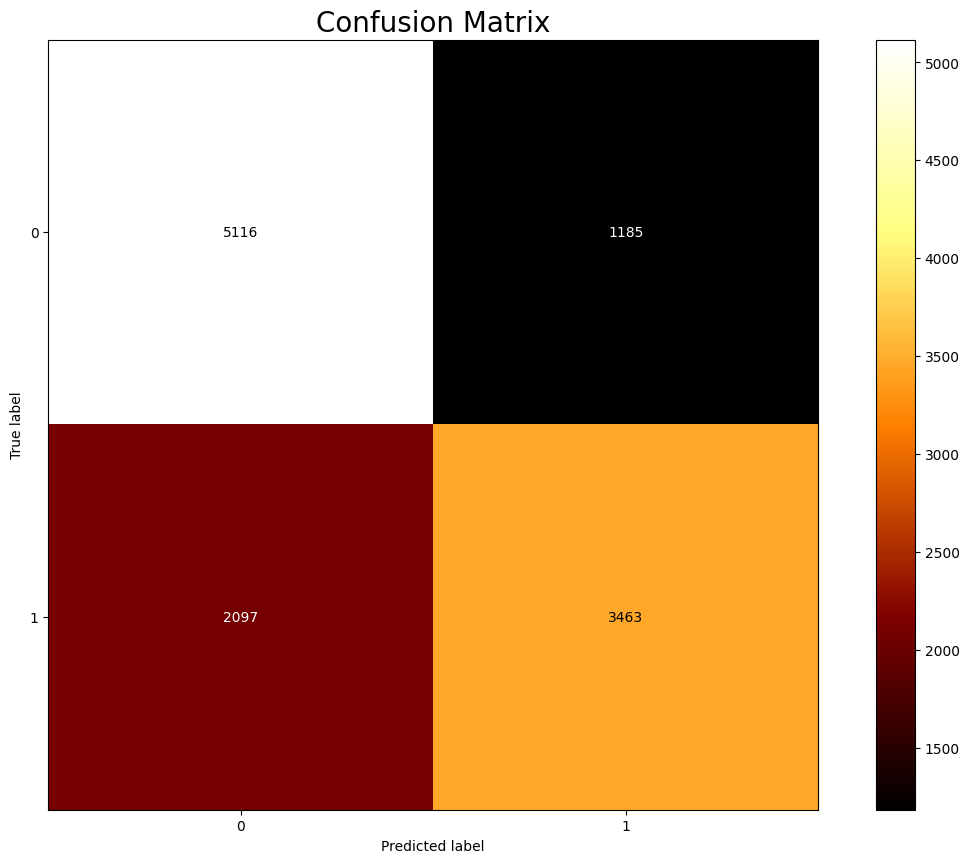

In [952]:
#predicting output on test data

y_pred = clf_best.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.afmhot,
                                               display_labels=clf_best.classes_)
fig =disp.ax_.get_figure()
fig.set_figwidth(15)
fig.set_figheight(10)
plt.title("Confusion Matrix", fontsize=20)
plt.show

The Confusion Matrix has two labels: the True label and the predicted label.
Breakdown of the Confusion Matrix
Actual \ Predicted	Predicted: 0 (No Disease)	Predicted: 1 (Has Disease)
Actual: 0 (No Disease)	5116 (True Negatives)	1185 (False Positives)
Actual: 1 (Has Disease)	2097 (False Negatives)	3463 (True Positives)
model is moderately effective (72.33% accuracy).
False Negatives are a concern (2097 cases)—this means real cardiovascular patients might be misclassified as healthy.
Try class balancing, better features, or more complex models to improve performance.

In [953]:
#Using proba to get class probalities
y_pred = clf_best.predict_log_proba(X_test)[:,1]

#Calaculating AUC_score
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC score: {auc_score: 2f}')

AUC score:  0.784264


In [954]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_probs = clf_best.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute precision-recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find the best threshold (where precision and recall balance well)
best_threshold = thresholds[np.argmax(precision * recall)]
print(f"Best threshold: {best_threshold}")


Best threshold: 1.2822780400893668e-07


In [955]:
# Make predictions using the optimized threshold
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Recalculate accuracy
from sklearn.metrics import accuracy_score
new_accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"New Accuracy with Optimized Threshold: {new_accuracy * 100:.2f}%")


New Accuracy with Optimized Threshold: 47.49%


Accuracy dropped significantly after adjusting the decision threshold. This suggests that the new threshold is too aggressive, likely favoring either precision or recall at the cost of accuracy.